In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [79]:
import seaborn as sns
sns.set()

In [2]:
cd ..

/home/shibinbin/ibme/projects/Deepfold2


In [10]:
from Bio import SeqIO
sequences = []
for record in SeqIO.parse('output/rfam_sample/seq/512/5S_rRNA.fa', 'fasta'):
    sequences.append(str(record.seq))
alphabet = np.unique(np.asarray(list(sequences[0]), dtype='U1'))

In [11]:
seq_onehot = (np.asarray(list(sequences[0]), dtype='U1')[:, np.newaxis] == alphabet[np.newaxis, :]).astype(np.int32)

In [17]:
dinuc_onehot = (seq_onehot[1:, :, np.newaxis]*seq_onehot[:-1, np.newaxis, :])

In [18]:
seq_onehot[1:10]

array([[0, 1, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [0, 1, 0, 0],
       [1, 0, 0, 0]], dtype=int32)

In [19]:
seq_onehot[0:9]

array([[1, 0, 0, 0],
       [0, 1, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [0, 1, 0, 0]], dtype=int32)

In [24]:
np.sum(dinuc_onehot, axis=0)

array([[37, 29, 30, 46],
       [33, 21, 21, 34],
       [30, 27, 14, 30],
       [43, 31, 36, 49]])

In [23]:
dinuc_onehot.shape

(511, 4, 4)

Text(0.5,0,'Evidence')

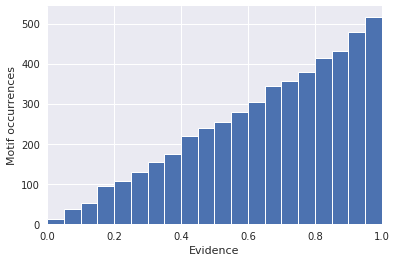

In [113]:
def sample_mixture(n=10, evidence_function='linear'):
    if evidence_function == 'linear':
        y = np.random.uniform(0, 1, size=n)
    elif evidence_function == 'sigmoid':
        y = 1.0/(1.0 + np.exp(-np.random.uniform(-4, 4, size=n)))
    z = (np.random.uniform(0, 1, size=n) < y).astype(np.int32)
    return y, z

y, z = sample_mixture(10000, evidence_function='linear')
n_bins = 20
y_bins = np.linspace(0, 1, n_bins + 1, endpoint=True)
y_binned = np.digitize(y, y_bins) - 1
z_binned_counts = np.sum((y_binned[:, np.newaxis] == np.arange(n_bins)[np.newaxis, :]).astype(np.int32)*z[:, np.newaxis],
                      axis=0)
fig, ax = plt.subplots(figsize=(6, 4))
ax.bar(y_bins[:-1] + 0.5/n_bins, z_binned_counts, width=1.0/n_bins, edgecolor='w', linewidth=1)
#ax.set_xticks(np.linspace())
ax.set_xlim(0, 1)
ax.set_ylabel('Motif occurrences')
ax.set_xlabel('Evidence')

In [78]:
z_binned_counts

array([ 46, 154, 263, 358, 472, 545, 641, 769, 883, 927])

In [106]:
from Bio import SeqIO

In [108]:
sequences = list(SeqIO.parse('output/rfam_sample/seq/512/5S_rRNA.fa', 'fasta'))

In [109]:
sequences[0]

SeqRecord(seq=Seq('ACAAUUAACAGGAUUCAAAGCAGUUUUAAUUGCGUGUUUACGGACGGACUAAAA...GUC', SingleLetterAlphabet()), id='5S_rRNA-sample1/104-222', name='5S_rRNA-sample1/104-222', description='5S_rRNA-sample1/104-222', dbxrefs=[])